In [3]:
#DQN algo

!pip install stable-baselines3[extra]


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached pygments-2.17.2-py3-none-any.whl (1.2 MB)
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446679 sha256=85cc3d0d4a292d65d70eb780adfc92a7612150bed0501dff0bc585539fbfd15b
  Stored in directory: c:\users\hskin\appdata\local\pip\cache\wheels\b1\1f\f7\2da07cf4f81ea264bdaf043028749d88fe0c2227134a22cf80
Successfully built AutoROM.accept-rom-license
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


In [65]:
%matplotlib inline

In [188]:
%run GT5aRandGridenv.ipynb
%run GT5vis.ipynb


In [3]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CallbackList, EvalCallback

from GT5RandGridenv import RandGridWorldEnv

#set up and train dqn agent
from stable_baselines3 import DQN

env = RandGridWorldEnv(size=10)
observation_info = env.reset()
observation = observation_info[0]
start = observation['agent'] 

def make_env(env0):
    env1 = Monitor(env0)
    return env1

# Create the vectorized environment
vec_env = make_vec_env(make_env(env), n_envs=1)

start1 = make_env()[1]
# Initialize the DQN agent
model = DQN('MultiInputPolicy', vec_env, verbose=1)

# Callback for evaluation
eval_callback = EvalCallback(env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=500,
                             deterministic=True, render=False)

# Collect callbacks
callback_list = CallbackList([eval_callback])

# Train the agent
model.learn(total_timesteps=100, callback=callback_list)

C:\Users\hskin\anaconda3\python.exe
C:\Users\hskin\anaconda3\python.exe


TypeError: 'Monitor' object is not callable

In [48]:
env_direct = RandGridWorldEnv(size=5)
print(dir(env_direct))

['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_action_to_direction', '_agent_location', '_get_info', '_get_obs', '_grid', '_initialize_start_target', '_is_protocol', '_np_random', '_render_frame', '_target_location', 'action_space', 'clock', 'close', 'generate_grid', 'get_wrapper_attr', 'metadata', 'np_random', 'observation_space', 'render', 'render_mode', 'reset', 'reward_range', 'size', 'spec', 'step', 'unwrapped', 'window', 'window_size']


In [135]:

#trying same as above but with start and end info
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from GT5RandGridenv import RandGridWorldEnv

#from stable_baselines3 import DQN


def make_env():
    env = RandGridWorldEnv(size=7)
    env = Monitor(env)  # This line adds the Monitor wrapper
    return env

# Create the environment
env1 = make_env()
model = DQN('MultiInputPolicy', env1, verbose=1)
max_steps = 10000  # Set a reasonable limit
step_count = 0

# Train the agent for a certain number of steps
model.learn(total_timesteps=1000)  # Adjust total_timesteps as needed


# After training, reset the environment and use the public method to get the start position
obs, _ = env1.reset()
start_position = obs['agent'] # Use the public method instead of accessing the private attribute



# Run the trained agent in the environment to get the end position
done = False
while not done and step_count < max_steps:
    action, _states = model.predict(obs, deterministic=True)
    action = int(action)  # Convert the action to an integer
    obs, rewards,_, done, info = env1.step(action)
    #observation, reward, terminated, False, info
    step_count += 1

goal_position = obs['target'] # Accessing the end position






Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57       |
|    ep_rew_mean      | 1        |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2134     |
|    time_elapsed     | 0        |
|    total_timesteps  | 228      |
----------------------------------


In [189]:
#same as above but want learning curve
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from GT5RandGridenv import RandGridWorldEnv

def make_env():
    env = RandGridWorldEnv(size=7)
    env = Monitor(env)
    return env

# Create the environment
env1 = make_env()
model = DQN('MultiInputPolicy', env1, verbose=1)
max_steps = 10000
step_count = 0

# Lists to store training data
episode_rewards = []
timesteps = []

max_steps = 500000  # Total timesteps for training
max_steps_per_episode = 5500  # Maximum steps in a single episode

# Train the agent and log data
episode_count = 0
while step_count < max_steps:
    obs, info = env1.reset()
    episode_reward = 0
    #print(f"Starting episode {episode_count + 1}")
    steps_this_episode = 0  # Reset steps count for the new episode

    while steps_this_episode < max_steps_per_episode:
        action, _states = model.predict(obs, deterministic=True)
        action = int(action)
        obs, reward, terminated, _, info = env.step(action)
        episode_reward += reward
        step_count += 1
        steps_this_episode += 1

        if terminated:
            #print(f"Episode {episode_count + 1} terminated after {steps_this_episode} steps, reward: {episode_reward}")
            break

    episode_rewards.append(episode_reward)
    timesteps.append(step_count)
    episode_count += 1
    print(f"Episode {episode_count} completed with reward {episode_reward}")

print("Training completed.")
print(f"Total episodes: {episode_count}")
print(f"Episode rewards: {episode_rewards}")
# Only plot if there are rewards to plot
if episode_rewards:
    plt.figure(figsize=(8, 6))
    plt.plot(timesteps, episode_rewards, label='Episode Rewards', color='blue')
    plt.xlabel('Timesteps')
    plt.ylabel('Episode Reward')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()
else:
    print("No rewards to plot.")


Using cpu device
Wrapping the env in a DummyVecEnv.
Episode 1 completed with reward -12099.800000000814
Episode 2 completed with reward -12100.000000000815
Episode 3 completed with reward -12100.000000000815
Episode 4 completed with reward -12100.000000000815
Episode 5 completed with reward -12100.000000000815
Episode 6 completed with reward -12100.000000000815
Episode 7 completed with reward -12100.000000000815
Episode 8 completed with reward -12100.000000000815
Episode 9 completed with reward -12100.000000000815
Episode 10 completed with reward -12100.000000000815
Episode 11 completed with reward -12100.000000000815
Episode 12 completed with reward -12100.000000000815
Episode 13 completed with reward -12100.000000000815
Episode 14 completed with reward -12100.000000000815
Episode 15 completed with reward -12100.000000000815
Episode 16 completed with reward -12100.000000000815
Episode 17 completed with reward -12100.000000000815
Episode 18 completed with reward -12100.000000000815
Epi

KeyboardInterrupt: 

In [194]:
env = make_env()
obs = env.reset()

for _ in range(100):  # Test for a few steps
    action = env1.action_space.sample()  # Random action
    obs, reward, terminated, _, info = env.step(action)
    print(f"Action: {action}, Reward: {reward}, Terminated: {terminated}")
    if terminated:
        obs = env.reset()
        print("Environment reset.")

Action: 2, Reward: 0, Terminated: False
Action: 2, Reward: 0, Terminated: False
Action: 2, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 2, Reward: 0, Terminated: False
Action: 3, Reward: 0, Terminated: False
Action: 1, Reward: 0, Terminated: False
Action: 1, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 3, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 2, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 3, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 1, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 3, Reward: 0, Terminated: False
Action: 1, Reward: 0, Terminated: False
Action: 1, Reward: 0, Terminated: False
Action: 1, Reward: 0, Terminated: False
Action: 0, Reward: 0, Terminated: False
Action: 2, Reward: 0, Terminated: False


In [ ]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(timesteps, episode_rewards, label='Episode Rewards', color='blue')
plt.xlabel('Timesteps')
plt.ylabel('Episode Reward')
plt.legend()
plt.title('Learning Curve')
plt.show()

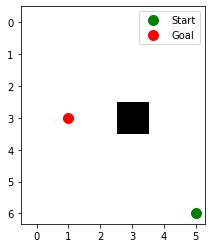

In [136]:
# Call the visualization function
visualize_np(env._grid,start_position,goal_position)


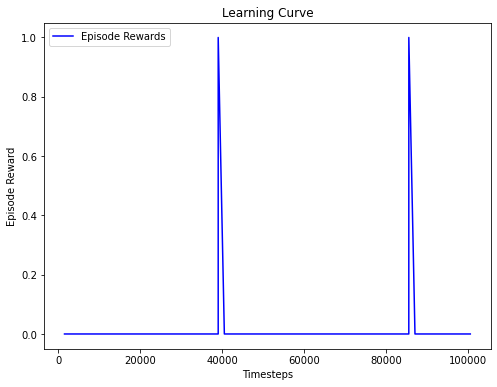

In [137]:
#retry learning curve

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(timesteps, episode_rewards, label='Episode Rewards', color='blue')
plt.xlabel('Timesteps')
plt.ylabel('Episode Reward')
plt.legend()
plt.title('Learning Curve')
plt.show()

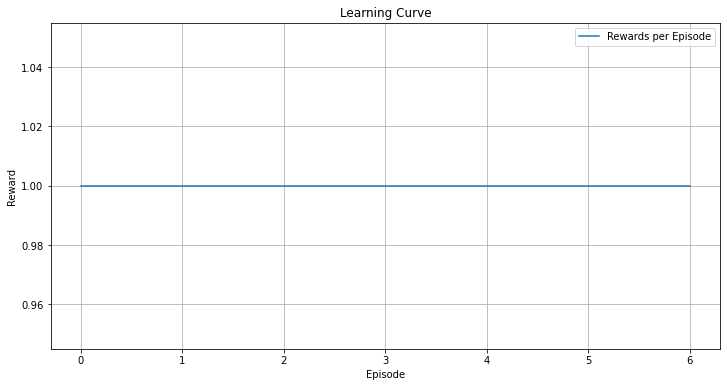

In [79]:
# Retrieve the results from the monitor
results = env1.get_episode_rewards()

# After training, plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(results, label='Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
from stable_baselines3.common.callbacks import CallbackList, EvalCallback

# Callback for evaluation
eval_callback = EvalCallback(env1, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=500,
                             deterministic=True, render=False)

# Collect callbacks
callback_list = CallbackList([eval_callback])

# Train the agent with callbacks
model.learn(total_timesteps=1000, callback=callback_list)

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 1        |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 8191     |
|    time_elapsed     | 0        |
|    total_timesteps  | 445      |
----------------------------------


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt


start = env.generate_grid()[-2]
goal = env.generate_grid()[-1]

above generates 2 different grids which is not what we want
